In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# TeamPJ - PUBG Finish Placement Prediction (Kernels Only)

#### 2022 Jun 13 ~  
- To do list

**main**
- 각자의 모델에 대한 이해 및 탐구, hyper-parameter tuning
- EDA

**sub**
Model 에 대한 처리 with featured_train_4.csv

**Goal** : Model 에 대한 visualization

## Basic Settings

In [ ]:
# FOr Data manipulate
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Data-Preprocessing
from timeit import default_timer as timer
from sklearn import preprocessing
import gc, sys
gc.enable()

# 경고 메시지 출력 표기 생략
import warnings
warnings.simplefilter('ignore')

In [ ]:
# For google colab memory issue
pd.set_option('mode.chained_assignment',  None)

In [ ]:
# Show every columns
pd.set_option('display.max_columns', 100)
pd.get_option('display.max_rows')

60

##### Memory Reduce 

In [ ]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    print('{')
    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        
        col_type = str(df[col].dtype)
        if col_type == 'object':
            col_type = 'str'
        else:
            col_type = 'np.' + col_type    
        #print('\'' + col + '\':' + col_type + ',')
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    print('}')
    return df

##### Feature Engineering - 4th
-> Load 'featured_train_4.csv'

In [ ]:
# Kaggle path
# base_path = '/kaggle/input/pubg-finish-placement-prediction/'

# Google Colab path
INPUT_DIR = '/content/drive/MyDrive/modlingPJ/input/'

In [ ]:
train = pd.read_csv(INPUT_DIR + 'featured_train_4.csv')

In [ ]:
reduce_mem_usage(train)

Memory usage of dataframe is 726.75 MB
{
Memory usage after optimization is: 181.69 MB
Decreased by 75.0%
}


,assists_mean,boosts_mean,damageDealt_mean,DBNOs_mean,headshotKills_mean,heals_mean,killPlace_mean,killPoints_mean,kills_mean,killStreaks_mean,longestKill_mean,maxPlace_mean,numGroups_mean,rankPoints_mean,revives_mean,rideDistance_mean,roadKills_mean,swimDistance_mean,teamKills_mean,vehicleDestroys_mean,walkDistance_mean,weaponsAcquired_mean,winPoints_mean,assists_mean_rank,boosts_mean_rank,damageDealt_mean_rank,DBNOs_mean_rank,headshotKills_mean_rank,heals_mean_rank,killPlace_mean_rank,killPoints_mean_rank,kills_mean_rank,killStreaks_mean_rank,longestKill_mean_rank,maxPlace_mean_rank,numGroups_mean_rank,rankPoints_mean_rank,revives_mean_rank,rideDistance_mean_rank,roadKills_mean_rank,swimDistance_mean_rank,teamKills_mean_rank,vehicleDestroys_mean_rank,walkDistance_mean_rank,weaponsAcquired_mean_rank,winPoints_mean_rank,winPlacePerc
0,0.000000,0.500000,109.687500,1.000000,0.000000,0.500000,41.000000,1242.0,1.000000,0.500000,6.273438,28.0,28.0,0.0,0.000000,0.0000,0.000000,0.000000,0.0,0.0,131.625000,1.000000,1479.0,0.285645,0.446533,0.571289,0.643066,0.339355,0.482178,0.428467,0.285645,0.643066,0.589355,0.535645,0.518066,0.518066,0.518066,0.339355,0.375000,0.518066,0.410645,0.500000,0.482178,0.285645,0.160767,0.357178,0.333252
1,0.000000,0.000000,48.000000,0.333252,0.000000,0.000000,90.500000,1356.0,0.000000,0.000000,0.000000,28.0,28.0,0.0,0.000000,0.0000,0.000000,0.000000,0.0,0.0,19.937500,0.833496,1464.0,0.285645,0.160767,0.321533,0.428467,0.339355,0.196411,0.964355,0.678711,0.196411,0.196411,0.196411,0.518066,0.518066,0.518066,0.339355,0.375000,0.518066,0.410645,0.500000,0.482178,0.071411,0.107117,0.142822,0.036987
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000,1382.0,0.000000,0.000000,0.000000,28.0,28.0,0.0,0.000000,0.0000,0.000000,0.000000,0.0,0.0,4.816406,0.500000,1485.0,0.285645,0.160767,0.071411,0.142822,0.339355,0.196411,1.000000,0.750000,0.196411,0.196411,0.196411,0.518066,0.518066,0.518066,0.339355,0.375000,0.518066,0.410645,0.500000,0.482178,0.035706,0.035706,0.571289,0.000000
3,0.000000,0.500000,11.703125,0.000000,0.000000,0.000000,59.500000,1178.0,0.000000,0.000000,0.000000,28.0,28.0,0.0,0.000000,0.0000,0.000000,0.000000,0.0,0.0,559.000000,7.000000,1458.0,0.285645,0.446533,0.142822,0.142822,0.339355,0.196411,0.785645,0.178589,0.196411,0.196411,0.196411,0.518066,0.518066,0.518066,0.339355,0.375000,0.518066,0.410645,0.500000,0.482178,0.392822,1.000000,0.107117,0.370361
4,1.000000,3.500000,341.000000,2.500000,1.000000,1.000000,14.000000,1504.0,3.000000,1.500000,25.234375,28.0,28.0,0.0,0.000000,79.9375,0.000000,5.574219,0.0,0.0,3292.000000,4.000000,1501.0,0.893066,0.856934,0.856934,0.856934,0.964355,0.553711,0.196411,0.928711,0.856934,0.893066,0.714355,0.518066,0.518066,0.518066,0.339355,0.821289,0.518066,0.893066,0.500000,0.482178,0.964355,0.625000,0.785645,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026739,0.000000,0.000000,16.953125,0.000000,0.000000,0.000000,29.000000,0.0,1.000000,1.000000,33.000000,29.0,29.0,1471.0,0.000000,1732.0000,0.000000,0.000000,0.0,0.0,2988.000000,3.000000,0.0,0.310303,0.189697,0.137939,0.155151,0.327637,0.189697,0.344727,0.517090,0.603516,0.741211,0.689453,0.517090,0.517090,0.517090,0.362061,0.724121,0.482666,0.482666,0.482666,0.500000,0.896484,0.413818,0.517090,0.643066
2026740,0.666504,2.666016,205.625000,1.333008,0.666504,6.667969,19.328125,0.0,1.333008,1.000000,116.125000,29.0,29.0,1452.0,1.333008,4300.0000,0.333252,0.000000,0.0,0.0,2023.000000,7.667969,0.0,0.844727,0.827637,0.758789,0.775879,0.948242,0.965332,0.206909,0.517090,0.707031,0.741211,0.896484,0.517090,0.517090,0.344727,1.000000,0.931152,0.965332,0.482666,0.482666,0.500000,0.689453,0.844727,0.517090,0.928711
2026741,0.000000,0.000000,25.953125,0.166626,0.000000,0.000000,82.000000,0.0,0.166626,0.166626,1.334961,29.0,29.0,1486.0,0.000000,0.0000,0.00000

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026744 entries, 0 to 2026743
Data columns (total 47 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   assists_mean               float16
 1   boosts_mean                float16
 2   damageDealt_mean           float16
 3   DBNOs_mean                 float16
 4   headshotKills_mean         float16
 5   heals_mean                 float16
 6   killPlace_mean             float16
 7   killPoints_mean            float16
 8   kills_mean                 float16
 9   killStreaks_mean           float16
 10  longestKill_mean           float16
 11  maxPlace_mean              float16
 12  numGroups_mean             float16
 13  rankPoints_mean            float16
 14  revives_mean               float16
 15  rideDistance_mean          float16
 16  roadKills_mean             float16
 17  swimDistance_mean          float16
 18  teamKills_mean             float16
 19  vehicleDestroys_mean       float16
 20  wa

In [ ]:
def state(message,start = True, time = 0):
    if(start):
        print(f'Working on {message} ... ')
    else :
        print(f'Working on {message} took ({round(time , 3)}) Sec \n')

In [ ]:
def feature_engineering(is_train=True):
    if is_train: 
        print('processing train_V2.csv')
        df = pd.read_csv(INPUT_DIR + 'train_V2.csv')
        df = df[df['maxPlace'] > 1]
    else:
        print('processing test_V2.csv')
        df = pd.read_csv(INPUT_DIR + 'test_V2.csv')

    state('rankPoints')
    s = timer()
    # Process the 'rankPoints' feature by replacing any value of (-1) to be (0) :
    df['rankPoints'] = np.where(df['rankPoints'] <= 0 ,0 , df['rankPoints'])
    e = timer()                                  
    state('rankPoints', False, e-s)


    target = 'winPlacePerc'
    # Get a list of the features to be used
    features = list(df.columns)
    
    # Remove some features from the features list :
    features.remove('Id')
    features.remove('matchId')
    features.remove('groupId')
    features.remove('matchDuration')
    features.remove('matchType')
    
    y = None

    if is_train: 
        y = np.array(df.groupby(['matchId','groupId'])[target].agg('mean'), dtype=np.float64)
        # Remove the target from the features list :
        features.remove(target)

    print('get group mean feature')
    agg = df.groupby(['matchId','groupId'])[features].agg('mean')
    # Put the new features into a rank form ( max value will have the highest rank)
    agg_rank = agg.groupby('matchId')[features].rank(pct=True).reset_index()


    if is_train: 
        df_out = agg.reset_index()[['matchId','groupId']]
    # If we are processing the test data let df_out = 'matchId' and 'groupId' without grouping 
    else: 
        df_out = df[['matchId','groupId']]

    df_out = df_out.merge(agg.reset_index(), suffixes=['', ''], how='left', on=['matchId', 'groupId'])
    df_out = df_out.merge(agg_rank, suffixes=['_mean', '_mean_rank'], how='left', on=['matchId', 'groupId'])

    df_out.drop(['matchId', 'groupId'], axis=1, inplace=True)

    X = np.array(df_out, dtype=np.float64)

    del df, agg, agg_rank
    gc.collect()

    df_out['winPlacePerc'] = y

    return df_out


In [ ]:
# test
test = feature_engineering(False)

processing test_V2.csv
Working on rankPoints ... 
Working on rankPoints took (0.023) Sec 

get group mean feature


In [ ]:
reduce_mem_usage(test)

Memory usage of dataframe is 708.32 MB
{
Memory usage after optimization is: 199.21 MB
Decreased by 71.9%
}


,assists_mean,boosts_mean,damageDealt_mean,DBNOs_mean,headshotKills_mean,heals_mean,killPlace_mean,killPoints_mean,kills_mean,killStreaks_mean,longestKill_mean,maxPlace_mean,numGroups_mean,rankPoints_mean,revives_mean,rideDistance_mean,roadKills_mean,swimDistance_mean,teamKills_mean,vehicleDestroys_mean,walkDistance_mean,weaponsAcquired_mean,winPoints_mean,assists_mean_rank,boosts_mean_rank,damageDealt_mean_rank,DBNOs_mean_rank,headshotKills_mean_rank,heals_mean_rank,killPlace_mean_rank,killPoints_mean_rank,kills_mean_rank,killStreaks_mean_rank,longestKill_mean_rank,maxPlace_mean_rank,numGroups_mean_rank,rankPoints_mean_rank,revives_mean_rank,rideDistance_mean_rank,roadKills_mean_rank,swimDistance_mean_rank,teamKills_mean_rank,vehicleDestroys_mean_rank,walkDistance_mean_rank,weaponsAcquired_mean_rank,winPoints_mean_rank,winPlacePerc
0,0.250000,0.000000,31.421875,0.250000,0.0,0.000000,71.50,0.0,0.000000,0.000000,0.00000,28.0,28.0,1446.0,0.000000,673.5,0.0,0.000000,0.000000,0.0,609.000,2.500000,0.0,0.625000,0.178589,0.178589,0.196411,0.321533,0.178589,0.928711,0.518066,0.160767,0.160767,0.160767,0.518066,0.518066,0.357178,0.267822,0.428467,0.500000,0.446533,0.464355,0.464355,0.392822,0.178589,0.518066,None
1,0.500000,5.000000,388.250000,2.000000,0.5,3.500000,7.00,0.0,3.500000,1.500000,277.25000,48.0,47.0,1511.0,1.000000,4672.0,0.0,0.000000,0.000000,0.0,2248.000,6.500000,0.0,0.840332,0.978516,0.957520,0.978516,0.851074,0.829590,0.042542,0.510742,0.978516,0.957520,1.000000,0.510742,0.510742,0.574707,0.989258,0.936035,0.510742,0.489258,0.489258,0.500000,0.787109,0.872559,0.510742,None
2,0.750000,2.250000,372.500000,2.000000,1.0,3.250000,25.75,0.0,3.000000,0.750000,63.59375,28.0,27.0,1542.0,0.000000,643.0,0.0,0.000000,0.000000,0.0,1099.000,3.750000,0.0,0.888672,0.814941,0.962891,0.925781,0.944336,0.888672,0.148193,0.518555,0.962891,0.722168,0.777832,0.518555,0.518555,0.962891,0.314697,0.703613,0.500000,0.426025,0.481445,0.481445,0.555664,0.537109,0.518555,None
3,0.000000,0.000000,82.750000,0.500000,0.0,0.000000,53.50,0.0,0.000000,0.000000,0.00000,45.0,44.0,1486.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1964.000,4.000000,0.0,0.340820,0.261475,0.545410,0.545410,0.386475,0.250000,0.681641,0.511230,0.261475,0.261475,0.261475,0.511230,0.511230,0.420410,0.386475,0.295410,0.511230,0.511230,0.465820,0.500000,0.636230,0.545410,0.511230,None
4,0.333252,2.333984,220.625000,1.333008,1.0,1.666992,12.00,0.0,2.333984,1.000000,57.93750,28.0,27.0,1502.0,0.333252,0.0,0.0,0.000000,0.000000,0.0,2898.000,6.000000,0.0,0.685059,0.870605,0.852051,0.833496,0.981445,0.703613,0.074097,0.518555,0.888672,0.833496,0.852051,0.518555,0.518555,0.888672,0.703613,0.407471,0.518555,0.462891,0.462891,0.518555,0.962891,0.962891,0.518555,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934169,0.333252,2.000000,226.000000,2.000000,0.0,6.332031,12.00,1312.0,2.333984,1.333008,54.71875,22.0,20.0,0.0,0.666504,0.0,0.0,0.000000,0.000000,0.0,1896.000,5.000000,1518.0,0.725098,0.649902,0.799805,0.850098,0.274902,0.950195,0.224976,0.649902,0.899902,0.799805,0.799805,0.524902,0.524902,0.524902,0.850098,0.425049,0.524902,0.399902,0.500000,0.524902,0.649902,0.700195,0.799805,None
1934170,0.000000,0.000000,35.031250,0.000000,0.0,0.250000,63.50,1436.0,0.000000,0.000000,0.00000,27.0,26.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1368.000,4.000000,1524.0,0.250000,0.211548,0.153809,0.134644,0.269287,0.480713,0.807617,0.922852,0.134644,0.134644,0.134644,0.519043,0.519043,0.519043,0.307617,0.346191,0.519043,0.442383,0.519043,0.519043,0.500000,0.557617,0.807617,None
1934171,0.333252,1.000000,91.812500,0.666504,0.0,4.000000,21.00,0.0,1.333008,1.333008,35.12500,29.0,29.0,1485.0,0.666504,0.0,0.0,2.599609,0.333252,0.0,3028.000,3.333984,0.0,0.844727,0.603516,0.551758,0.465576,0.344727,1.000000,0.206909,0.517090,0.689453,0.896484,0.896484,0.517090,0.51

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1934174 entries, 0 to 1934173
Data columns (total 47 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   assists_mean               float16
 1   boosts_mean                float16
 2   damageDealt_mean           float16
 3   DBNOs_mean                 float16
 4   headshotKills_mean         float16
 5   heals_mean                 float16
 6   killPlace_mean             float16
 7   killPoints_mean            float16
 8   kills_mean                 float16
 9   killStreaks_mean           float16
 10  longestKill_mean           float16
 11  maxPlace_mean              float16
 12  numGroups_mean             float16
 13  rankPoints_mean            float16
 14  revives_mean               float16
 15  rideDistance_mean          float16
 16  roadKills_mean             float16
 17  swimDistance_mean          float16
 18  teamKills_mean             float16
 19  vehicleDestroys_mean       float16
 20  wa

In [ ]:
print(train.shape, test.shape)

(2026744, 47) (1934174, 47)


## Model

#### Data Split & Scaling

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026744 entries, 0 to 2026743
Data columns (total 47 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   assists_mean               float16
 1   boosts_mean                float16
 2   damageDealt_mean           float16
 3   DBNOs_mean                 float16
 4   headshotKills_mean         float16
 5   heals_mean                 float16
 6   killPlace_mean             float16
 7   killPoints_mean            float16
 8   kills_mean                 float16
 9   killStreaks_mean           float16
 10  longestKill_mean           float16
 11  maxPlace_mean              float16
 12  numGroups_mean             float16
 13  rankPoints_mean            float16
 14  revives_mean               float16
 15  rideDistance_mean          float16
 16  roadKills_mean             float16
 17  swimDistance_mean          float16
 18  teamKills_mean             float16
 19  vehicleDestroys_mean       float16
 20  wa

In [ ]:
x = train.drop('winPlacePerc', axis=1)
y = train['winPlacePerc']

In [ ]:
# Data Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

# 6 : 2 : 2 = train : validation : test
print('Train/Test Sizes : ', x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Train/Test Sizes :  (1621395, 46) (405349, 46) (1621395,) (405349,)


#### Modeling / Hyper-parameter Tuning / Optimization

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Models
from sklearn.linear_model import LinearRegression   # 1. Linear Regression
from sklearn.linear_model import Lasso              # 2. Lasso
from sklearn.linear_model import Ridge              # 3. Ridge
from xgboost.sklearn import XGBRegressor            # 4. XGBoost
from lightgbm.sklearn import LGBMRegressor          # 5. LightGBM
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor  # 6. RandomForestRegressor
from sklearn.datasets import make_regression

# Scores
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# LinearRegression

linReg = LinearRegression()

linReg.fit(x_train, y_train)

pred_train_lin = linReg.predict(x_train)
pred_val_lin = linReg.predict(x_test)

mae_train_lin = mean_absolute_error(y_train, pred_train_lin)
mae_val_lin = mean_absolute_error(y_test, pred_val_lin)

print('# 1. Linear Regression\t, train=%.4f, val=%.4f' % (mae_train_lin, mae_val_lin))
result_lin = linReg.predict(x_test)

print('---------- Linear Regression ---------')
print('MAE in training: %.4f' % mean_absolute_error(y_test, result_lin))

#  1. Linear Regression	, train=0.0581, val=0.0580
# ---------- Linear Regression ---------
# MAE in training: 0.0580

# 1. Linear Regression	, train=0.0581, val=0.0581
---------- Linear Regression ---------
MAE in training: 0.0581


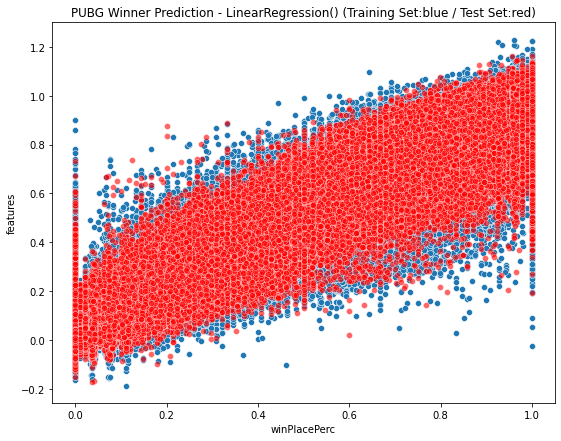

In [ ]:
plt.figure(figsize=(9,7))
ax1 = sns.scatterplot(x=y_train, y=pred_train_lin)
ax2 = sns.scatterplot(x=y_test, y=pred_val_lin, color='red', alpha=0.6)
plt.title('PUBG Winner Prediction - LinearRegression() (Training Set:blue / Test Set:red)')
plt.ylabel('features')
plt.xlabel('winPlacePerc')
plt.show()

In [ ]:
# Lasso

las = Lasso()

las.fit(x_train, y_train)

pred_train_las = las.predict(x_train)
pred_val_las = las.predict(x_test)

mae_train_las = mean_absolute_error(y_train, pred_train_las)
mae_val_las = mean_absolute_error(y_test, pred_val_las)

print('# 2. Lasso\t, train=%.4f, val=%.4f' % (mae_train_las, mae_val_las))
result_las = las.predict(x_test)

print('---------- Lasso ---------')
print('MAE in training: %.4f' % mean_absolute_error(y_test, result_las))

# 2. Lasso	, train=0.2588, val=0.2585
---------- Lasso ---------
MAE in training: 0.2585


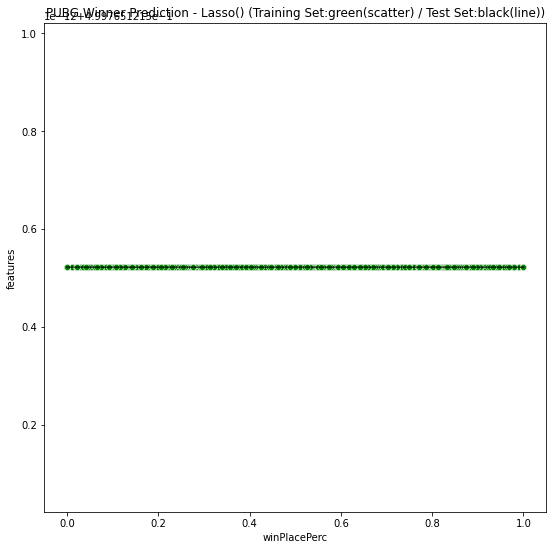

In [ ]:
plt.figure(figsize=(9,9))
ax1 = sns.scatterplot(x=y_train, y=pred_train_las, color='green')
ax2 = sns.lineplot(x=y_test, y=pred_val_las, color='black', alpha=0.6)
plt.title('PUBG Winner Prediction - Lasso() (Training Set:green(scatter) / Test Set:black(line))')
plt.ylabel('features')
plt.xlabel('winPlacePerc')
plt.show()

In [ ]:
# Ridge

rid = Ridge()

rid.fit(x_train, y_train)

pred_train_rid = rid.predict(x_train)
pred_val_rid = rid.predict(x_test)

mae_train_rid = mean_absolute_error(y_train, pred_train_rid)
mae_val_rid = mean_absolute_error(y_test, pred_val_rid)

print('# 3. Ridge\t, train=%.4f, val=%.4f' % (mae_train_rid, mae_val_rid))
result_rid = rid.predict(x_test)

print('---------- Ridge ---------')
print('MAE in training: %.4f' % mean_absolute_error(y_test, result_rid))

# 3. Ridge	, train=0.0581, val=0.0580
---------- Ridge ---------
MAE in training: 0.0580


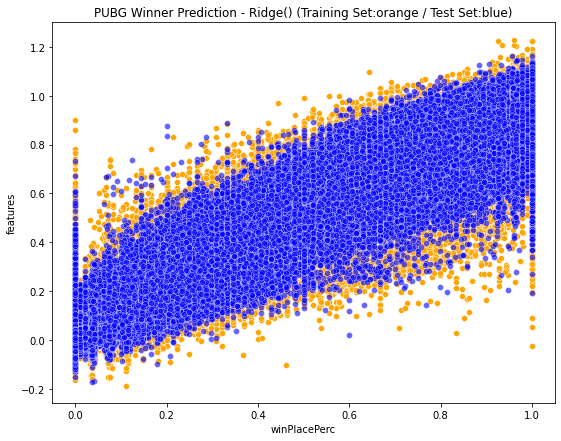

In [ ]:
plt.figure(figsize=(9,7))
ax1 = sns.scatterplot(x=y_train, y=pred_train_rid, color='orange')
ax2 = sns.scatterplot(x=y_test, y=pred_val_rid, color='blue', alpha=0.6)
plt.title('PUBG Winner Prediction - Ridge() (Training Set:orange / Test Set:blue)')
plt.ylabel('features')
plt.xlabel('winPlacePerc')
plt.show()

In [ ]:
# XGBRegressor

xgb = XGBRegressor()

xgb.fit(x_train, y_train)

pred_train_xgb = xgb.predict(x_train)
pred_val_xgb = xgb.predict(x_test)

mae_train_xgb = mean_absolute_error(y_train, pred_train_xgb)
mae_val_xgb = mean_absolute_error(y_test, pred_val_xgb)

print('# 4. XGBRegressor\t, train=%.4f, val=%.4f' % (mae_train_xgb, mae_val_xgb))
result_xgb = xgb.predict(x_test)

print('---------- XGBRegressor ---------')
print('MAE in training: %.4f' % mean_absolute_error(y_test, result_xgb))

[08:57:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
# 3. XGBRegressor	, train=0.0542, val=0.0542
---------- XGBRegressor ---------
MAE in training: 0.0542


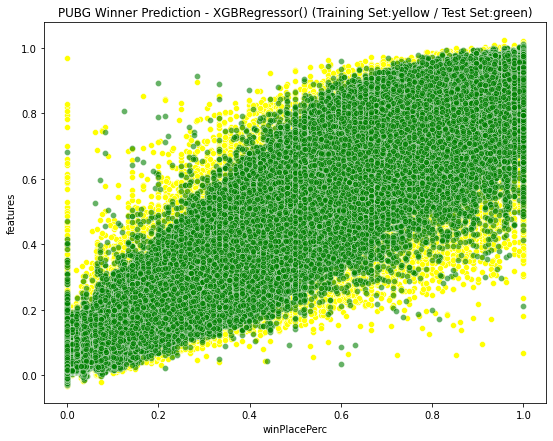

In [ ]:
plt.figure(figsize=(9,7))
ax1 = sns.scatterplot(x=y_train, y=pred_train_xgb, color='yellow')
ax2 = sns.scatterplot(x=y_test, y=pred_val_xgb, color='green', alpha=0.6)
plt.title('PUBG Winner Prediction - XGBRegressor() (Training Set:yellow / Test Set:green)')
plt.ylabel('features')
plt.xlabel('winPlacePerc')
plt.show()

In [ ]:
# LGBMRegressor

lgb = LGBMRegressor()

lgb.fit(x_train, y_train)

pred_train_lgb = lgb.predict(x_train)
pred_val_lgb = lgb.predict(x_test)

mae_train_lgb = mean_absolute_error(y_train, pred_train_lgb)
mae_val_lgb = mean_absolute_error(y_test, pred_val_lgb)

print('# 5. LGBMRegressor\t, train=%.4f, val=%.4f' % (mae_train_lgb, mae_val_lgb))
result_lgb = lgb.predict(x_test)

print('---------- LGBMRegressor ---------')
print('MAE in training: %.4f' % mean_absolute_error(y_test, result_lgb))

# 5. LGBMRegressor	, train=0.0466, val=0.0467
---------- LGBMRegressor ---------
MAE in training: 0.0467


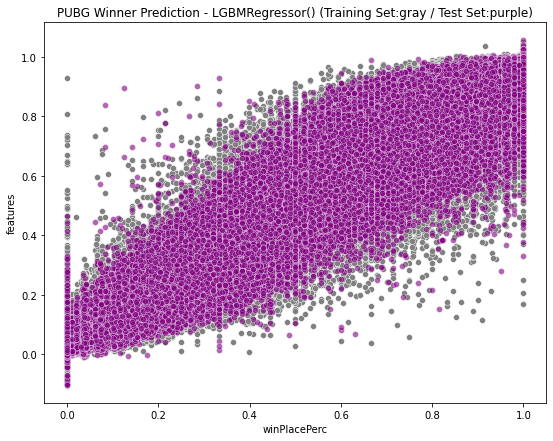

In [ ]:
plt.figure(figsize=(9,7))
ax1 = sns.scatterplot(x=y_train, y=pred_train_lgb, color='gray')
ax2 = sns.scatterplot(x=y_test, y=pred_val_lgb, color='purple', alpha=0.6)
plt.title('PUBG Winner Prediction - LGBMRegressor() (Training Set:gray / Test Set:purple)')
plt.ylabel('features')
plt.xlabel('winPlacePerc')
plt.show()

### Feature version scores - No Hyper-Parameter Tuning

In [ ]:
train_origin = pd.read_csv(INPUT_DIR + 'train_V2.csv')
train_1 = pd.read_csv(INPUT_DIR + 'featured_train_1.csv')
train_2 = pd.read_csv(INPUT_DIR + 'featured_train_2.csv')
train_3 = pd.read_csv(INPUT_DIR + 'featured_train_3.csv')
train_4 = pd.read_csv(INPUT_DIR + 'featured_train_4.csv')
train_origin = reduce_mem_usage(train_origin)
train_1 = reduce_mem_usage(train_1)
train_2 = reduce_mem_usage(train_2)
train_3 = reduce_mem_usage(train_3)
train_4 = reduce_mem_usage(train_4)

Memory usage of dataframe is 983.90 MB
{
Memory usage after optimization is: 288.39 MB
Decreased by 70.7%
}
Memory usage of dataframe is 712.48 MB
{
Memory usage after optimization is: 127.23 MB
Decreased by 82.1%
}
Memory usage of dataframe is 610.70 MB
{
Memory usage after optimization is: 106.02 MB
Decreased by 82.6%
}
Memory usage of dataframe is 293.31 MB
{
Memory usage after optimization is: 73.33 MB
Decreased by 75.0%
}
Memory usage of dataframe is 726.75 MB
{
Memory usage after optimization is: 181.69 MB
Decreased by 75.0%
}


In [ ]:
def modeling(model_, ver_):
    # Data Split for each version of df
    x = train.drop('winPlacePerc', axis=1)
    y = train['winPlacePerc']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

    # Modeling
    model = model_
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    return mean_absolute_error(y_test, pred)

In [ ]:
def modeling_scaled(model_, ver_):
    # Data Split for each version of df
    x = train.drop('winPlacePerc', axis=1)
    y = train['winPlacePerc']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

    # Scaler
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Modeling
    model = model_
    model.fit(x_train_scaled, y_train)
    pred = model.predict(x_test_scaled)
    
    return mean_absolute_error(y_test, pred)

###### Model List
- LinearRegression
- Lasso
- Ridge
- LGBMRegressor
- XGBRegressor
- DecisionTreeRegressor (new)
- RandomForestRegressor (new)
- SVR(x) -> Too long to get a result

In [ ]:
# Model list
from sklearn.linear_model import LinearRegression   # 1. Linear Regression
from sklearn.linear_model import Lasso              # 2. Lasso
from sklearn.linear_model import Ridge              # 3. Ridge
from lightgbm.sklearn import LGBMRegressor          # 4. LightGBM
from xgboost.sklearn import XGBRegressor            # 5. XGBoost
from sklearn.tree import DecisionTreeRegressor      # 6. DecisionTreeRegressor
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor  # 7. RandomForestRegressor
from sklearn.datasets import make_regression

In [ ]:
# 1. Linear Regression

print(f'{"-"*10} LinearRegression {"-"*10}')
MAE_LinReg_origin = modeling(LinearRegression(), train_origin)
MAE_LinReg_scaled_origin = modeling_scaled(LinearRegression(), train_origin)
print(f'Train Data_Origin : MAE_LinReg : {MAE_LinReg_origin} / Scaled MAE_LinReg : {MAE_LinReg_scaled_origin}')
MAE_LinReg_1 = modeling(LinearRegression(), train_1)
MAE_LinReg_scaled_1 = modeling_scaled(LinearRegression(), train_1)
print(f'Train Data_Feature_1 : MAE_LinReg : {MAE_LinReg_1} / Scaled MAE_LinReg : {MAE_LinReg_scaled_1}')
MAE_LinReg_2 = modeling(LinearRegression(), train_2)
MAE_LinReg_scaled_2 = modeling_scaled(LinearRegression(), train_2)
print(f'Train Data_Feature_2 : MAE_LinReg : {MAE_LinReg_2} / Scaled MAE_LinReg : {MAE_LinReg_scaled_2}')
MAE_LinReg_3 = modeling(LinearRegression(), train_3)
MAE_LinReg_scaled_3 = modeling_scaled(LinearRegression(), train_3)
print(f'Train Data_Feature_3 : MAE_LinReg : {MAE_LinReg_3} / Scaled MAE_LinReg : {MAE_LinReg_scaled_3}')
MAE_LinReg_4 = modeling(LinearRegression(), train_4)
MAE_LinReg_scaled_4 = modeling_scaled(LinearRegression(), train_4)
print(f'Train Data_Feature_4 : MAE_LinReg : {MAE_LinReg_4} / Scaled MAE_LinReg : {MAE_LinReg_scaled_4}')

---------- LinearRegression ----------
Train Data_Origin : MAE_LinReg : 0.05806595832109451 / Scaled MAE_LinReg : 0.05806562304496765
Train Data_Feature_1 : MAE_LinReg : 0.05806595832109451 / Scaled MAE_LinReg : 0.05806562304496765
Train Data_Feature_2 : MAE_LinReg : 0.05806595832109451 / Scaled MAE_LinReg : 0.05806562304496765
Train Data_Feature_3 : MAE_LinReg : 0.05806595832109451 / Scaled MAE_LinReg : 0.05806562304496765
Train Data_Feature_4 : MAE_LinReg : 0.05806595832109451 / Scaled MAE_LinReg : 0.05806562304496765


In [ ]:
# mtNum = pubg.loc[:,'simpleMatchNum'].value_counts().to_frame().reset_index()
# mtNum.columns = ['Type','Count']
# mtNum

In [ ]:
# 2. Lasso
print(f'{"-"*10} Lasso {"-"*10}')
MAE_Lasso_origin = modeling(Lasso(), train_origin)
MAE_Lasso_scaled_origin = modeling_scaled(Lasso(), train_origin)
print(f'Train Data_Origin : MAE_Lasso : {MAE_Lasso_origin} / Scaled MAE_Lasso : {MAE_Lasso_scaled_origin}')
MAE_Lasso_1 = modeling(Lasso(), train_1)
MAE_Lasso_scaled_1 = modeling_scaled(Lasso(), train_1)
print(f'Train Data_Feature_1 : MAE_Lasso : {MAE_Lasso_1} / Scaled MAE_Lasso : {MAE_Lasso_scaled_1}')
MAE_Lasso_2 = modeling(Lasso(), train_2)
MAE_Lasso_scaled_2 = modeling_scaled(Lasso(), train_2)
print(f'Train Data_Feature_2 : MAE_Lasso : {MAE_Lasso_2} / Scaled MAE_Lasso : {MAE_Lasso_scaled_2}')
MAE_Lasso_3 = modeling(Lasso(), train_3)
MAE_Lasso_scaled_3 = modeling_scaled(Lasso(), train_3)
print(f'Train Data_Feature_3 : MAE_Lasso : {MAE_Lasso_3} / Scaled MAE_Lasso : {MAE_Lasso_scaled_3}')
MAE_Lasso_4 = modeling(Lasso(), train_4)
MAE_Lasso_scaled_4 = modeling_scaled(Lasso(), train_4)
print(f'Train Data_Feature_4 : MAE_Lasso : {MAE_Lasso_4} / Scaled MAE_Lasso : {MAE_Lasso_scaled_4}')

---------- Lasso ----------
Train Data_Origin : MAE_Lasso : 0.11478695335567686 / Scaled MAE_Lasso : 0.25866622187295063
Train Data_Feature_1 : MAE_Lasso : 0.11478695335567686 / Scaled MAE_Lasso : 0.25866622187295063
Train Data_Feature_2 : MAE_Lasso : 0.11478695335567686 / Scaled MAE_Lasso : 0.25866622187295063
Train Data_Feature_3 : MAE_Lasso : 0.11478695335567686 / Scaled MAE_Lasso : 0.25866622187295063
Train Data_Feature_4 : MAE_Lasso : 0.11478695335567686 / Scaled MAE_Lasso : 0.25866622187295063


In [ ]:
# 3. Ridge
print(f'{"-"*10} Ridge {"-"*10}')
MAE_Ridge_origin = modeling(Ridge(), train_origin)
MAE_Ridge_scaled_origin = modeling_scaled(Ridge(), train_origin)
print(f'Train Data_Origin : MAE_Ridge : {MAE_Ridge_origin} / Scaled MAE_Ridge : {MAE_Ridge_scaled_origin}')
MAE_Ridge_1 = modeling(Ridge(), train_1)
MAE_Ridge_scaled_1 = modeling_scaled(Ridge(), train_1)
print(f'Train Data_Feature_1 : MAE_Ridge : {MAE_Ridge_1} / Scaled MAE_Ridge : {MAE_Ridge_scaled_1}')
MAE_Ridge_2 = modeling(Ridge(), train_2)
MAE_Ridge_scaled_2 = modeling_scaled(Ridge(), train_2)
print(f'Train Data_Feature_2 : MAE_Ridge : {MAE_Ridge_2} / Scaled MAE_Ridge : {MAE_Ridge_scaled_2}')
MAE_Ridge_3 = modeling(Ridge(), train_3)
MAE_Ridge_scaled_3 = modeling_scaled(Ridge(), train_3)
print(f'Train Data_Feature_3 : MAE_Ridge : {MAE_Ridge_3} / Scaled MAE_Ridge : {MAE_Ridge_scaled_3}')
MAE_Ridge_4 = modeling(Ridge(), train_4)
MAE_Ridge_scaled_4 = modeling_scaled(Ridge(), train_4)
print(f'Train Data_Feature_4 : MAE_Ridge : {MAE_Ridge_4} / Scaled MAE_Ridge : {MAE_Ridge_scaled_4}')

---------- Ridge ----------
Train Data_Origin : MAE_Ridge : 0.05806709320004615 / Scaled MAE_Ridge : 0.05806580123451004
Train Data_Feature_1 : MAE_Ridge : 0.05806709320004615 / Scaled MAE_Ridge : 0.05806580123451004
Train Data_Feature_2 : MAE_Ridge : 0.05806709320004615 / Scaled MAE_Ridge : 0.05806580123451004
Train Data_Feature_3 : MAE_Ridge : 0.05806709320004615 / Scaled MAE_Ridge : 0.05806580123451004
Train Data_Feature_4 : MAE_Ridge : 0.05806709320004615 / Scaled MAE_Ridge : 0.05806580123451004


In [ ]:
# 4. LightGBM
print(f'{"-"*10} LGBMRegressor {"-"*10}')
MAE_lightGBM_origin = modeling(LGBMRegressor(), train_origin)
MAE_lightGBM_scaled_origin = modeling_scaled(LGBMRegressor(), train_origin)
print(f'Train Data_Origin : MAE_lightGBM : {MAE_lightGBM_origin} / Scaled MAE_lightGBM : {MAE_lightGBM_scaled_origin}')
MAE_lightGBM_1 = modeling(LGBMRegressor(), train_1)
MAE_lightGBM_scaled_1 = modeling_scaled(LGBMRegressor(), train_1)
print(f'Train Data_Feature_1 : MAE_lightGBM : {MAE_lightGBM_1} / Scaled MAE_lightGBM : {MAE_lightGBM_scaled_1}')
MAE_lightGBM_2 = modeling(LGBMRegressor(), train_2)
MAE_lightGBM_scaled_2 = modeling_scaled(LGBMRegressor(), train_2)
print(f'Train Data_Feature_2 : MAE_lightGBM : {MAE_lightGBM_2} / Scaled MAE_lightGBM : {MAE_lightGBM_scaled_2}')
MAE_lightGBM_3 = modeling(LGBMRegressor(), train_3)
MAE_lightGBM_scaled_3 = modeling_scaled(LGBMRegressor(), train_3)
print(f'Train Data_Feature_3 : MAE_lightGBM : {MAE_lightGBM_3} / Scaled MAE_lightGBM : {MAE_lightGBM_scaled_3}')
MAE_lightGBM_4 = modeling(LGBMRegressor(), train_4)
MAE_lightGBM_scaled_4 = modeling_scaled(LGBMRegressor(), train_4)
print(f'Train Data_Feature_4 : MAE_lightGBM : {MAE_lightGBM_4} / Scaled MAE_lightGBM : {MAE_lightGBM_scaled_4}')

---------- LGBMRegressor ----------
Train Data_Origin : MAE_lightGBM : 0.046706629722549034 / Scaled MAE_lightGBM : 0.04672307514595742
Train Data_Feature_1 : MAE_lightGBM : 0.046706629722549034 / Scaled MAE_lightGBM : 0.04672307514595742
Train Data_Feature_2 : MAE_lightGBM : 0.046706629722549034 / Scaled MAE_lightGBM : 0.04672307514595742
Train Data_Feature_3 : MAE_lightGBM : 0.046706629722549034 / Scaled MAE_lightGBM : 0.04672307514595742
Train Data_Feature_4 : MAE_lightGBM : 0.046706629722549034 / Scaled MAE_lightGBM : 0.04672307514595742


In [ ]:
# 5. XGBoost
print(f'{"-"*10} XGBRegressor {"-"*10}')
MAE_xgbReg_origin = modeling(XGBRegressor(), train_origin)
MAE_xgbReg_scaled_origin = modeling_scaled(XGBRegressor(), train_origin)
print(f'Train Data_Origin : MAE_xgbReg : {MAE_xgbReg_origin} / Scaled MAE_xgbReg : {MAE_xgbReg_scaled_origin}')
MAE_xgbReg_1 = modeling(XGBRegressor(), train_1)
MAE_xgbReg_scaled_1 = modeling_scaled(XGBRegressor(), train_1)
print(f'Train Data_Feature_1 : MAE_xgbReg : {MAE_xgbReg_1} / Scaled MAE_xgbReg : {MAE_xgbReg_scaled_1}')
MAE_xgbReg_2 = modeling(XGBRegressor(), train_2)
MAE_xgbReg_scaled_2 = modeling_scaled(XGBRegressor(), train_2)
print(f'Train Data_Feature_2 : MAE_xgbReg : {MAE_xgbReg_2} / Scaled MAE_xgbReg : {MAE_xgbReg_scaled_2}')
MAE_xgbReg_3 = modeling(XGBRegressor(), train_3)
MAE_xgbReg_scaled_3 = modeling_scaled(XGBRegressor(), train_3)
print(f'Train Data_Feature_3 : MAE_xgbReg : {MAE_xgbReg_3} / Scaled MAE_xgbReg : {MAE_xgbReg_scaled_3}')
MAE_xgbReg_4 = modeling(XGBRegressor(), train_4)
MAE_xgbReg_scaled_4 = modeling_scaled(XGBRegressor(), train_4)
print(f'Train Data_Feature_4 : MAE_xgbReg : {MAE_xgbReg_4} / Scaled MAE_xgbReg : {MAE_xgbReg_scaled_4}')

---------- XGBRegressor ----------
[12:08:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:16:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train Data_Origin : MAE_xgbReg : 0.05431665480136871 / Scaled MAE_xgbReg : 0.05431652441620827
[12:24:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:31:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train Data_Feature_1 : MAE_xgbReg : 0.05431665480136871 / Scaled MAE_xgbReg : 0.05431652441620827
[12:41:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:46:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train Data

In [ ]:
def featureImportance(ver_):
# Data Split for each version of df
x = train.drop('winPlacePerc', axis=1)
y = train['winPlacePerc']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Scaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
lasso_list = list()
lasso_list.append(MAE_Lasso_origin)
lasso_list.append(MAE_Lasso_1)
lasso_list.append(MAE_Lasso_2)
lasso_list.append(MAE_Lasso_3)
lasso_list.append(MAE_Lasso_4)

lasso_list_scaled = list()
lasso_list_scaled.append(MAE_Lasso_scaled_origin)
lasso_list_scaled.append(MAE_Lasso_scaled_1)
lasso_list_scaled.append(MAE_Lasso_scaled_2)
lasso_list_scaled.append(MAE_Lasso_scaled_3)
lasso_list_scaled.append(MAE_Lasso_scaled_4)


# fig, ax = plt.figures(figsize=(20, 17))

# plt.figure(figsize=(9,7))
# ax1 = sns.lineplot(x=y_train, y=lasso_list, color='purple')
# ax2 = sns.lineplot(x=y_test, y=lasso_list_scaled, color='gray')
# plt.title('PUBG Winner Prediction - Lasso() (purple : Lasso Score / gray : Lasso Scaled Score)')
# plt.ylabel('features')
# plt.xlabel('winPlacePerc')
# plt.show()

# plt.show()

In [ ]:
# lin_reg = np.array
# mtNum.columns = ['Type','Count']
# mtNum

In [ ]:
def modeling_scaled(model_, ver_):
    # Data Split for each version of df
    x = train.drop('winPlacePerc', axis=1)
    y = train['winPlacePerc']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

    # Scaler
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Modeling
    model = model_
    model.fit(x_train_scaled, y_train)
    pred = model.predict(x_test_scaled)
    
    return mean_absolute_error(y_test, pred)

In [ ]:
# # 6. DecisionTreeRegressor


# train1_depth2 = modeling_scaled(regr_1, train_1)

# # Fit regression model
# regr_1 = DecisionTreeRegressor(max_depth=2)
# regr_2 = DecisionTreeRegressor(max_depth=5)
# regr_1.fit(x, y)
# regr_2.fit(x, y)

# # Predict
# _test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
# y_1 = regr_1.predict(x_test)
# y_2 = regr_2.predict(x_test)


In [ ]:
# # Plot the results
# plt.figure()
# plt.scatter(x, y, s=20, edgecolor="black", c="darkorange", label="data")
# plt.plot(x_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
# plt.plot(x_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
# plt.xlabel("data")
# plt.ylabel("target")
# plt.title("Decision Tree Regression")
# plt.legend()
# plt.show()

In [ ]:
# 7. RandomForestRegressor


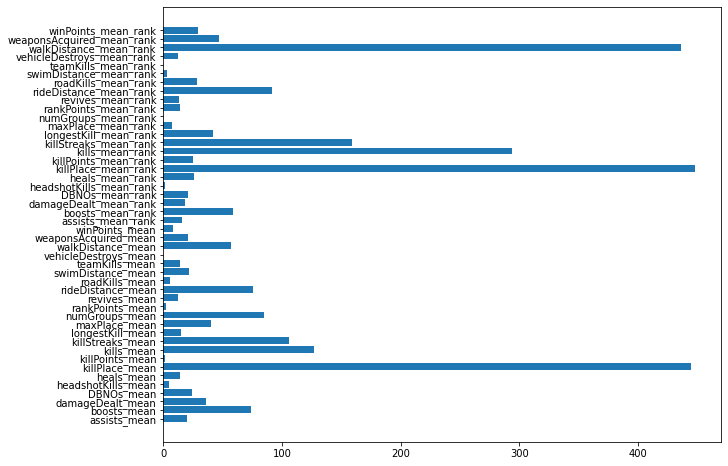

In [ ]:
plt.figure(figsize=(10,8))
plt.barh(x.columns, LGBMRegressor().fit(x_train_scaled, y_train).feature_importances_)
plt.show()

In [ ]:
def featueImportancePlot(ver_):
    from lightgbm.sklearn import LGBMRegressor
    from sklearn.model_selection import train_test_split
    # Data Split for each version of df
    x = ver_.drop('winPlacePerc', axis=1)
    y = ver_['winPlacePerc']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

    # Scaler
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Modeling
    lgb_model = LGBMRegressor()
    lgb_model.fit(x_train_scaled, y_train)
    pred = lgb_model.predict(x_test_scaled)

    # Drawing plot
    plt.figure(figsize=(10,8))
    plt.barh(x.columns, LGBMRegressor().fit(x_train_scaled, y_train).feature_importances_)
    plt.title(f'Feature Importance Barplot')
    plt.show()

    #return mean_absolute_error(y_test, pred)

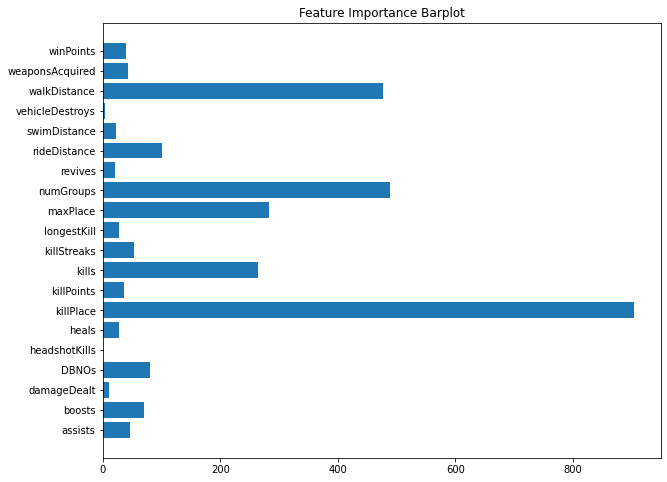

In [ ]:
featueImportancePlot(train_1)

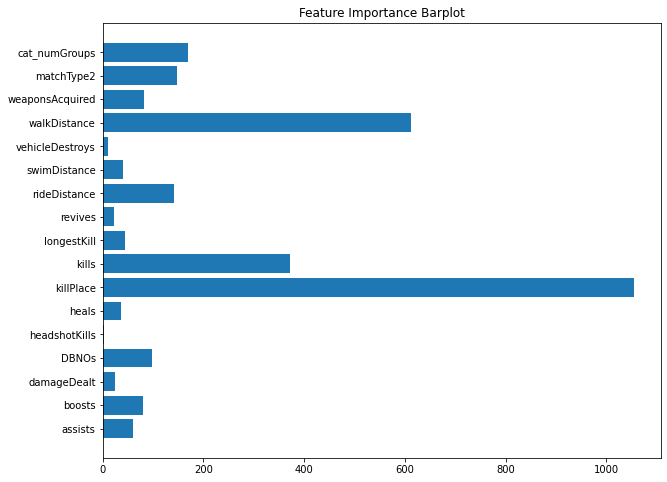

In [ ]:
featueImportancePlot(train_2)

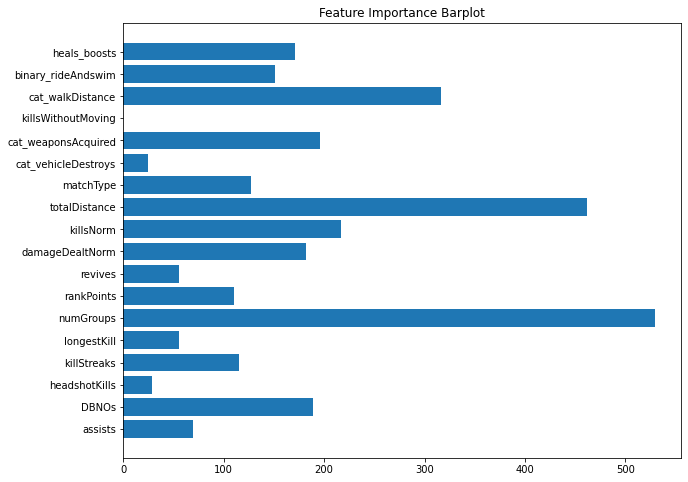

In [ ]:
featueImportancePlot(train_3)

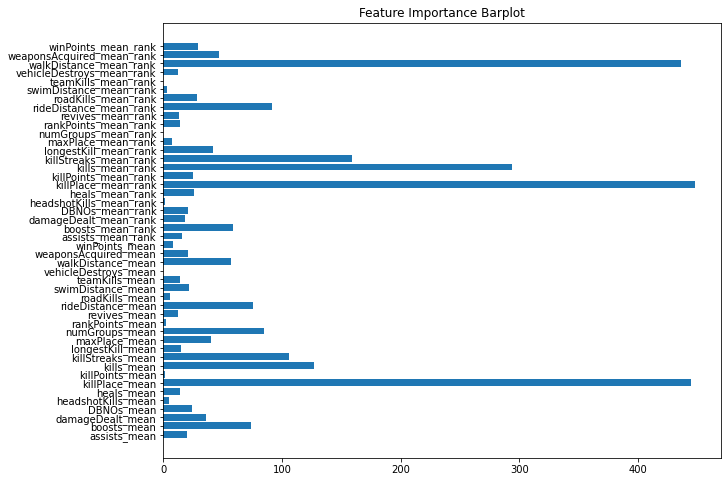

In [ ]:
featueImportancePlot(train_4)

In [ ]:
# Z-score 로 normalization 체크 해보기.

In [ ]:
def z_score_normalize(lst):
    normalized = []
    for value in lst:
        normalized_num = (value - np.mean(lst)) / np.std(lst)
        normalized.append(normalized_num)
    return normalized

In [ ]:
from scipy.stats import zscore
import pandas as pd

# Create a sample df
df = pd.DataFrame({'num_1': [1,2,3,4,5,6,7,8,9,3,4,6,5,7,3,2,9]})

# Calculate the zscores and drop zscores into new column
df['num_1_zscore'] = zscore(df['num_1'])

display(df)

# Calculate the zscores and drop zscores into new column
train_1['heals_zscore'] = zscore(train_1['heals'])
train_1['heals_zscore'] = zscore(train_1['heals'])

display(train_1)

,num_1,num_1_zscore
0,1,-1.633660
1,2,-1.219150
2,3,-0.804639
3,4,-0.390128
4,5,0.024383
5,6,0.438894
6,7,0.853405
7,8,1.267916
8,9,1.682426
9,3,-0.804639
